In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
from pathlib import Path

data_path = Path('../../data_analysis_lect/datasets/medical_cost/medical_cost.csv')
df = pd.read_csv(data_path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


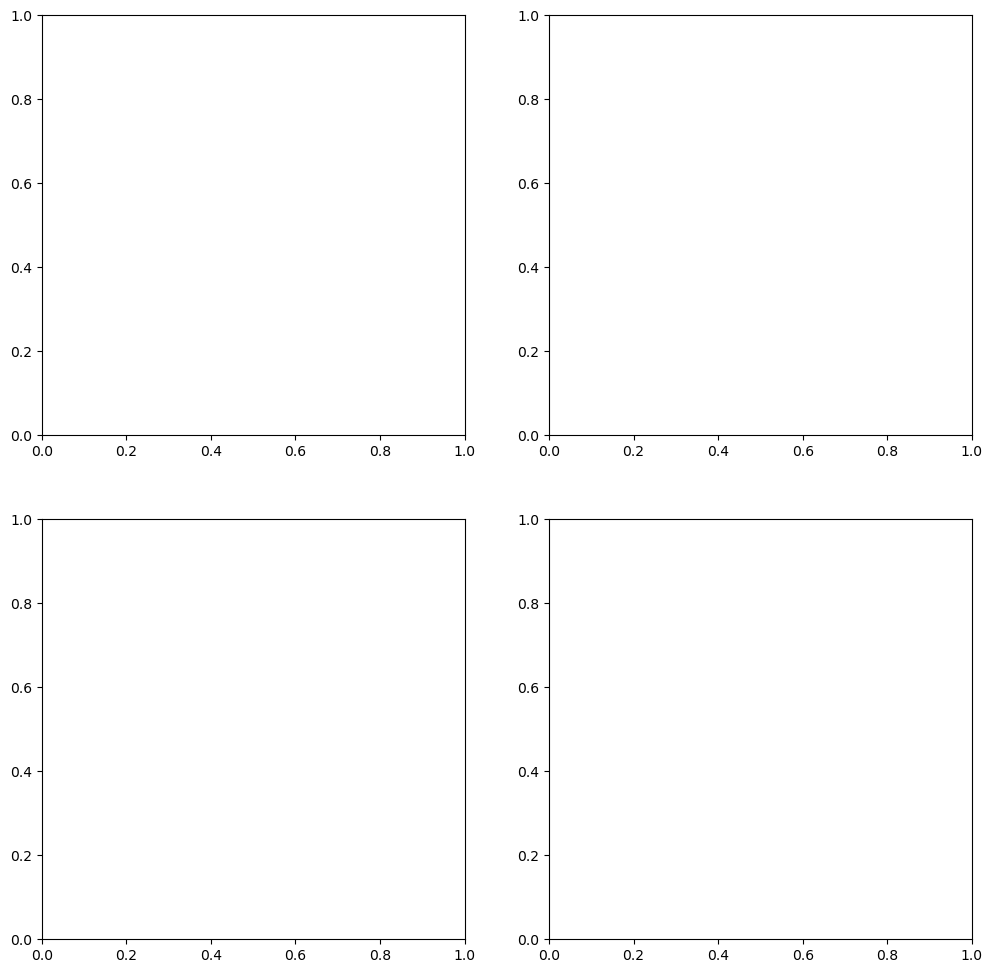

In [6]:

# matplotlib subplots를 이용한 2x2 subplot 생성
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

Text(0.5, 1.0, 'region : northeast')

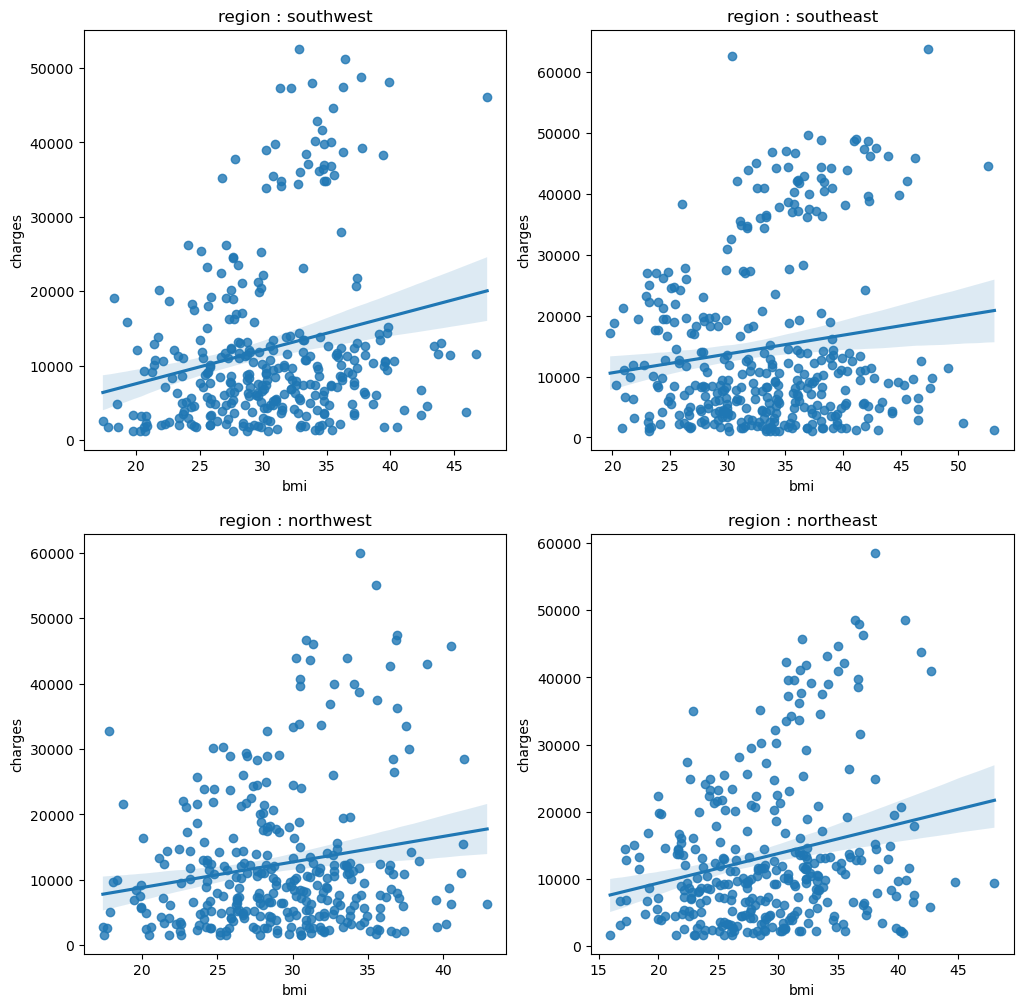

In [9]:
# matplotlib 2x2 subplot에 Seaborn regplot 시각화
fig, ax = plt.subplots(2, 2, figsize=(12, 12))
sns.regplot(
    x='bmi', y='charges', data=df.query('region == "southwest"'),
    ax=ax[0][0]
)
ax[0][0].set_title('region : southwest')

sns.regplot(
    x='bmi', y='charges', data=df.query('region == "southeast"'),
    ax=ax[0][1]
)
ax[0][1].set_title('region : southeast')

sns.regplot(
    x='bmi', y='charges', data=df.query('region == "northwest"'),
    ax=ax[1][0]
    )
ax[1][0].set_title('region : northwest')

sns.regplot(
    x='bmi', y='charges', data=df.query('region == "northeast"'),
    ax=ax[1][1]
    )
ax[1][1].set_title('region : northeast')




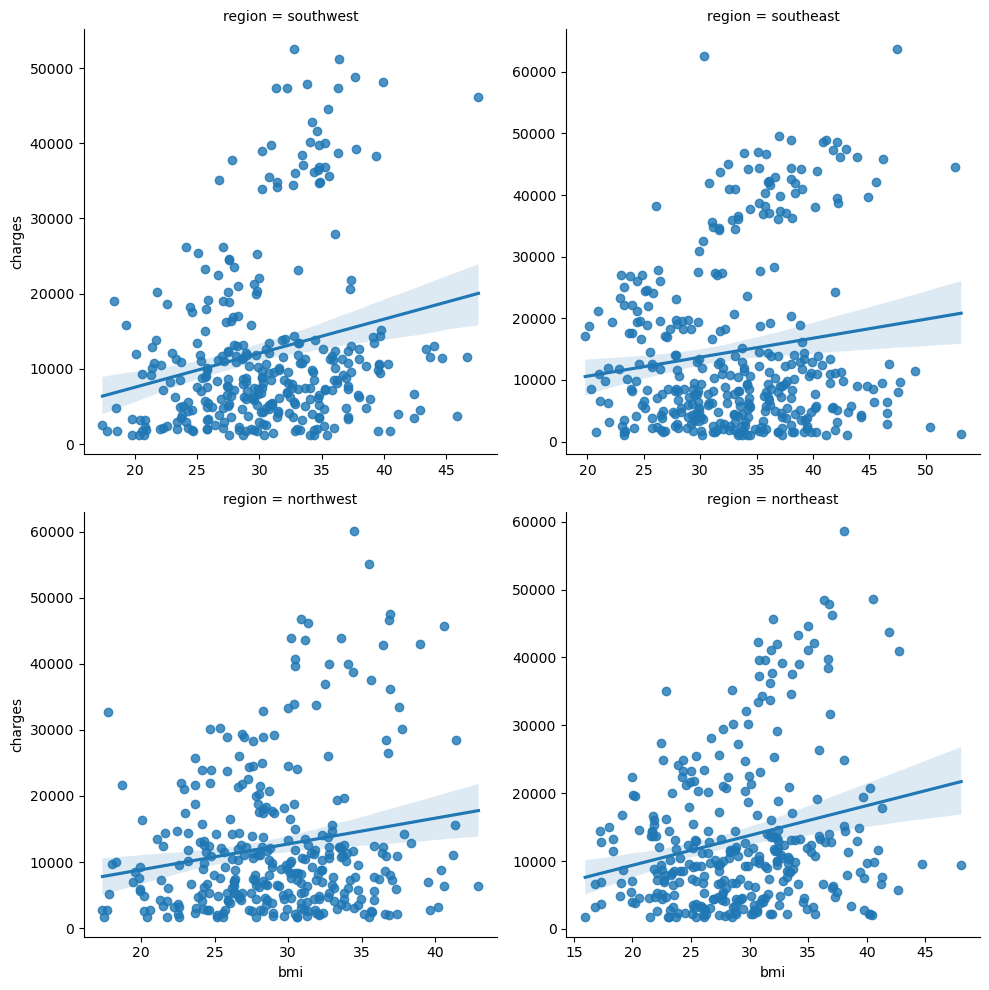

In [8]:
# seaborn lmplot으로 동일한 plot 그리기
sns.lmplot(
    x='bmi', y='charges', data=df,
    col='region', col_wrap=2,
    facet_kws={"sharex": False, "sharey":False}
)

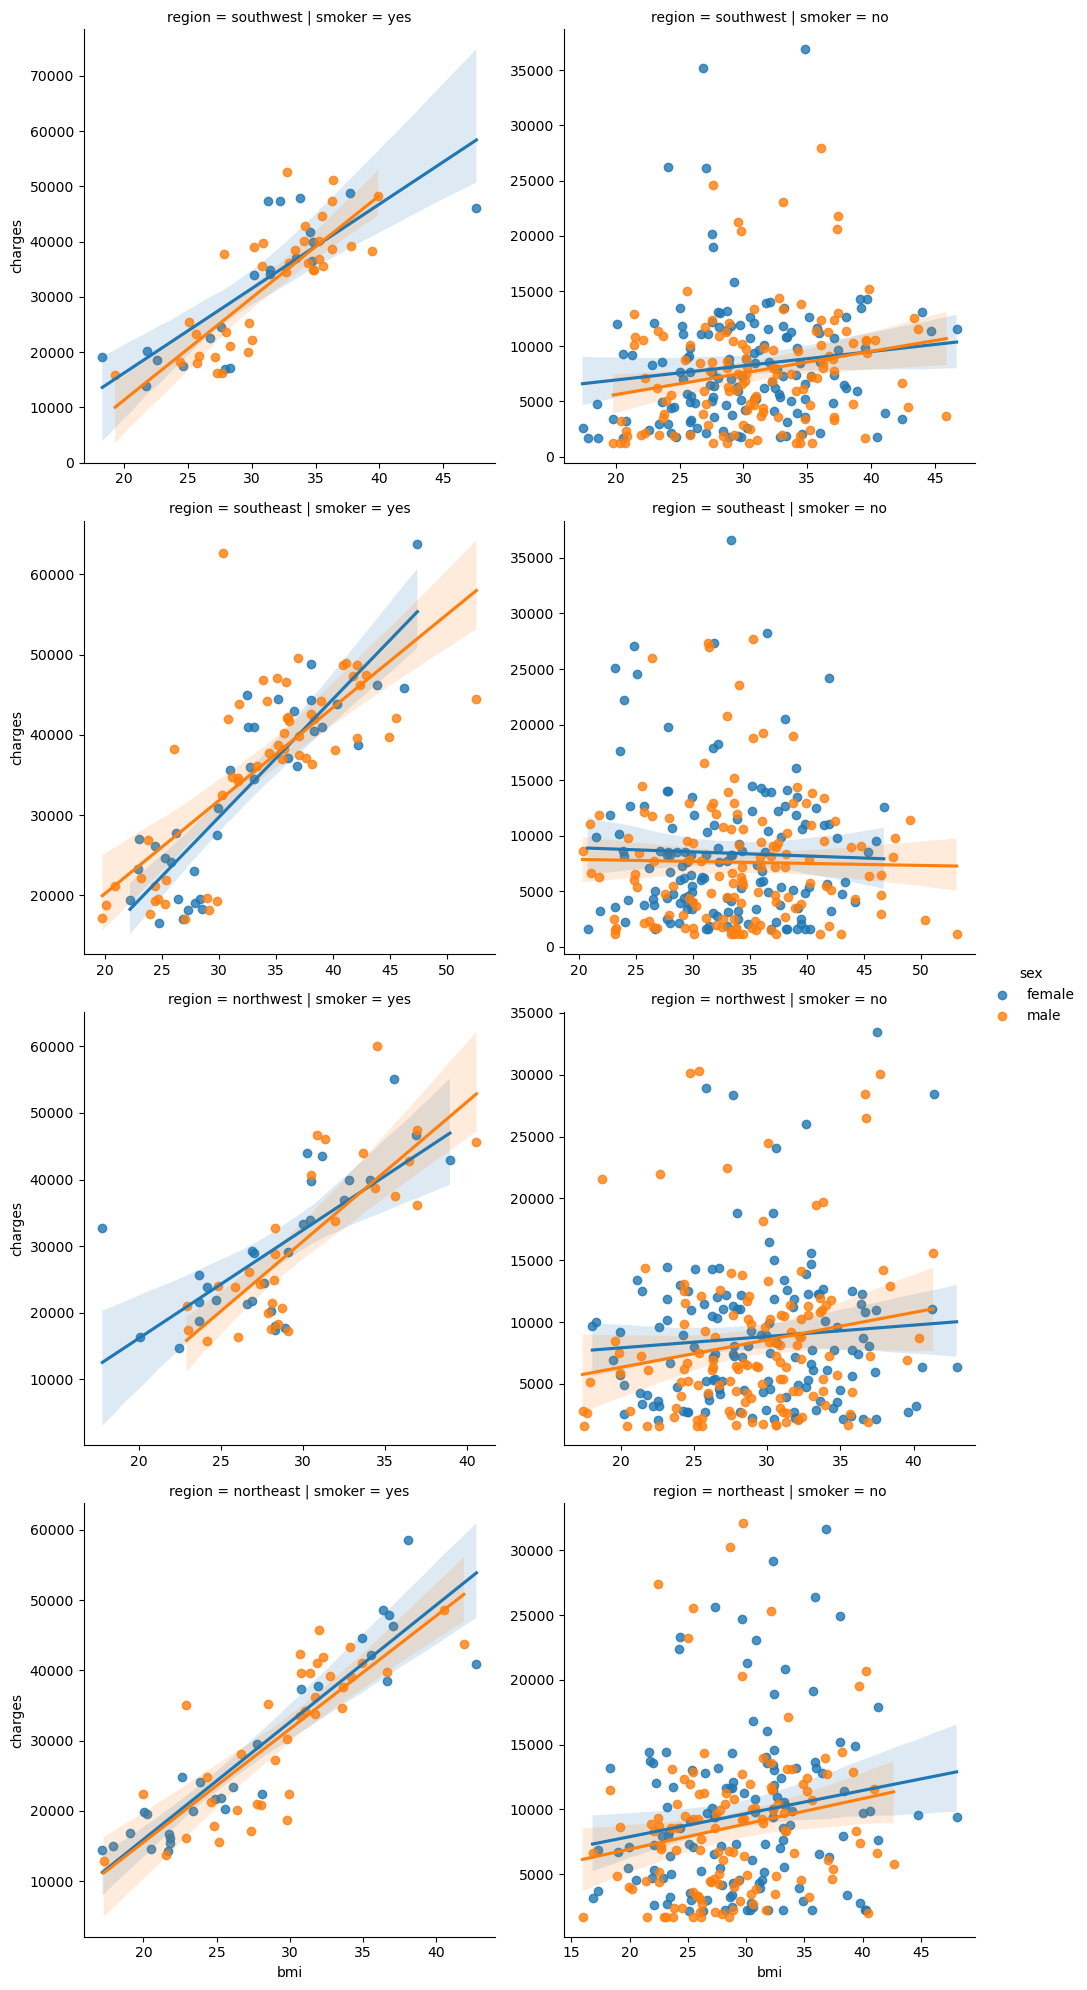

In [12]:


# seaborn lmplot의 hue 인자 활용
sns.lmplot(
    x='bmi', y='charges', data=df,
    col='smoker', row='region', hue='sex',
    facet_kws={"sharex": False, "sharey":False}
)

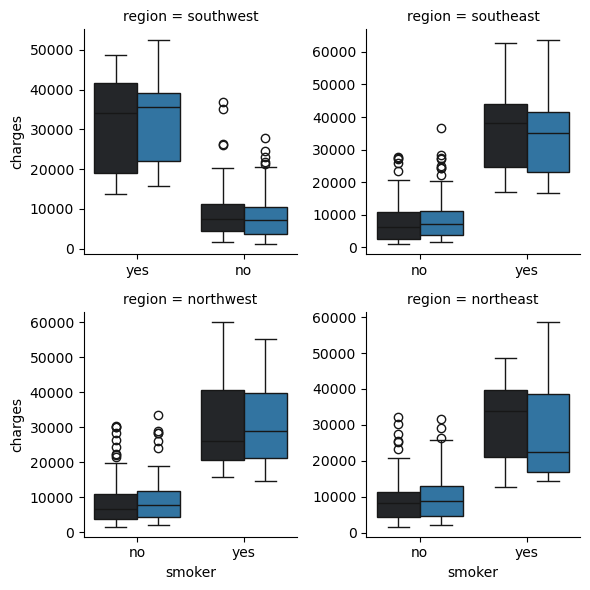

In [13]:
# Seaborn facetgrid를 활용한 boxplot 나누어 그리기
g = sns.FacetGrid(
    data=df, col='region', col_wrap=2, sharex=False, sharey=False
)
g.map_dataframe(
    sns.boxplot, x='smoker', y='charges', hue='sex', palette='dark:#1f77b4'  # color 대신 palette 사용
)

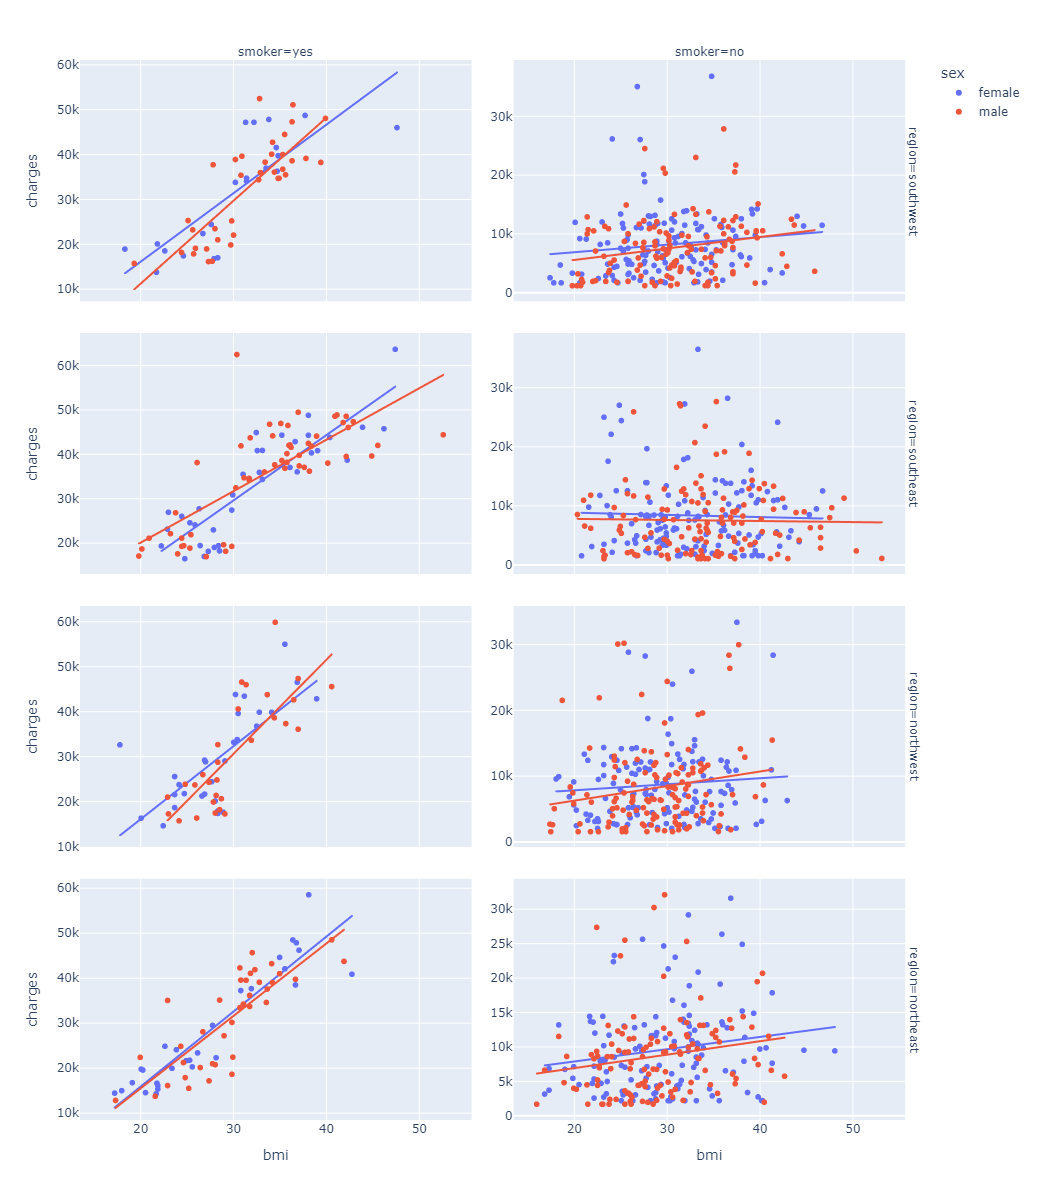

In [14]:

# Plotly facet을 활용한 scatterplot을 subplot에 나누어 그리기
fig = px.scatter(
    data_frame=df, x='bmi', y='charges',
    color='sex', facet_row='region', facet_col='smoker',
    width=700, height=1200, trendline='ols', facet_col_spacing=0.05 #facet_col_spacing: 그래프간 간격
).update_yaxes(matches=None, showticklabels=True)
fig.show()

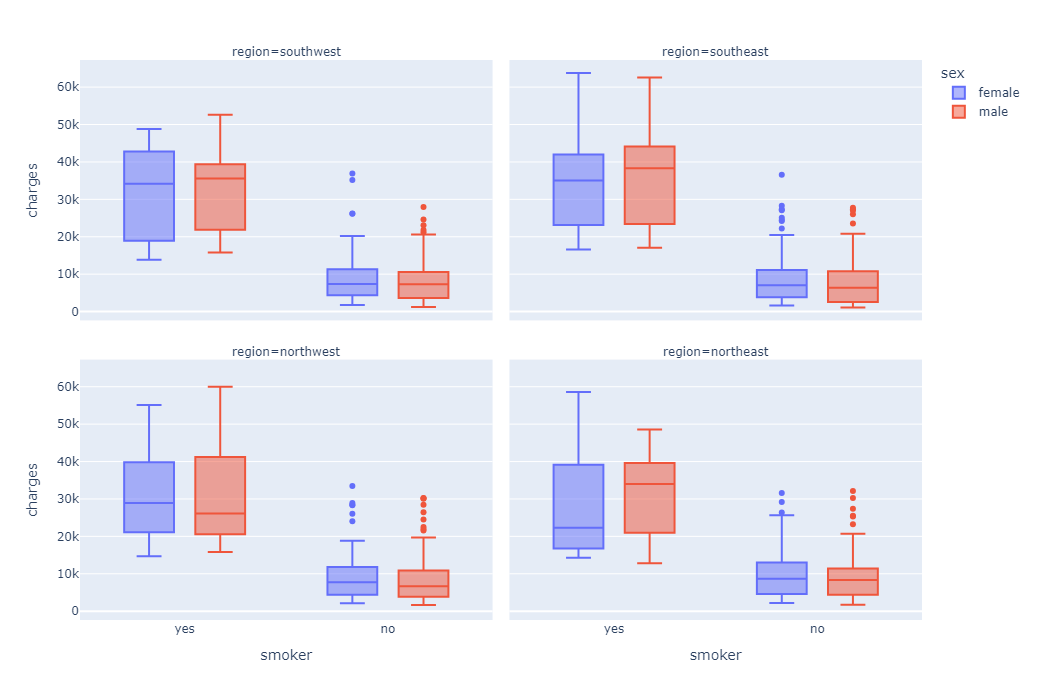

In [12]:
# Plotly facet을 활용한 boxplot을 subplot에 나누어 그리기
fig = px.box(
    data_frame=df, x='smoker', y='charges',
    facet_col='region', facet_col_wrap=2, color='sex',   
    width=700, height=700
)
fig.show()